In [21]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
import sklearn
from sklearn.cluster import KMeans
import cv2
import numpy as np
import PIL
from PIL import Image, ImageChops

In [11]:
with uproot.open('toyForStudents_5.root') as datafile:
    data_df = datafile['R0Tree'].arrays(library='pd')

In [12]:
df = pd.DataFrame(data_df)
df

,x,y,id,sample
0,3.460569,0.673391,1,1
1,3.075171,0.761314,1,1
2,2.746258,1.339751,1,1
3,2.190463,2.049242,1,1
4,3.988466,0.707543,1,1
...,...,...,...,...
3399995,3.656641,0.730766,-1,17
3399996,5.113425,0.666245,-1,17
3399997,2.826508,1.441562,-1,17
3399998,3.683099,1.125471,-1,17


In [15]:
grouped = df.groupby(['id', 'sample'])
for key, group_df in grouped:
    print(f"Group key: {key}")
    print(group_df)

Group key: (-1, 1)
                x         y  id  sample
1700000  3.524324  2.084737  -1       1
1700001  3.497870  1.261757  -1       1
1700002  2.418601  1.440717  -1       1
1700003  3.495933  1.956262  -1       1
1700004  2.284854  2.110827  -1       1
...           ...       ...  ..     ...
1799995  4.818124  0.807776  -1       1
1799996  4.082955  0.873010  -1       1
1799997  5.049155  0.740994  -1       1
1799998  3.069079  1.227595  -1       1
1799999  3.439480  0.627733  -1       1

[100000 rows x 4 columns]
Group key: (-1, 2)
                x         y  id  sample
1800000  2.181661  1.770344  -1       2
1800001  4.829564  0.467630  -1       2
1800002  3.602718  1.585928  -1       2
1800003  2.900563  1.845139  -1       2
1800004  3.573937  1.502458  -1       2
...           ...       ...  ..     ...
1899995  4.032999  0.956972  -1       2
1899996  2.773396  1.375505  -1       2
1899997  2.787475  1.800485  -1       2
1899998  2.383537  2.184798  -1       2
1899999  4.9759

In [23]:
def print_images():
    for sample, group in grouped:
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        # DLA id = -1
        axs[0].scatter(group[group['id'] == -1]['x'], group[group['id'] == -1]['y'], label='id = -1', color='blue')
        axs[0].set_title(f'Obrazek dla sample {sample} (id = -1)')
        axs[0].set_xlabel('x')
        axs[0].set_ylabel('y')
        axs[0].legend()

        # DLA id = 1
        axs[1].scatter(group[group['id'] == 1]['x'], group[group['id'] == 1]['y'], label='id = 1', color='red')
        axs[1].set_title(f'Obrazek dla sample {sample} (id = 1)')
        axs[1].set_xlabel('x')
        axs[1].set_ylabel('y')
        axs[1].legend()

        plt.tight_layout()
        plt.show()

## Cluster analysis
https://scikit-learn.org/stable/modules/clustering.html

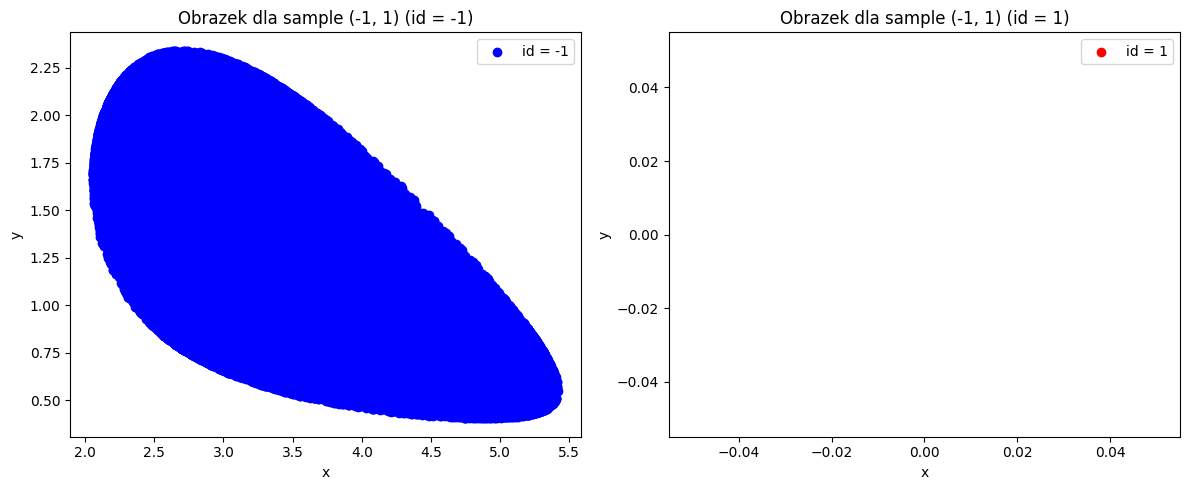

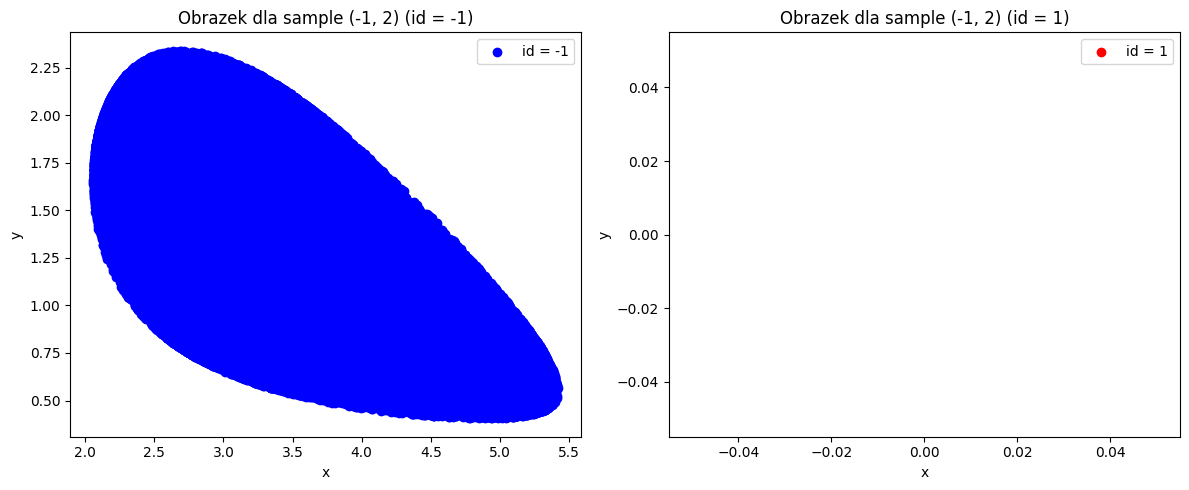

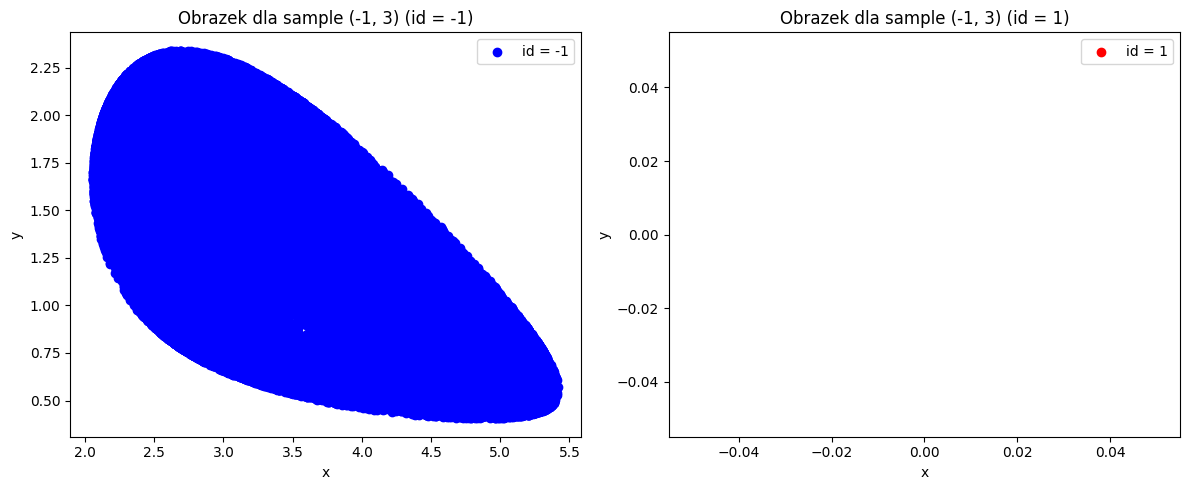

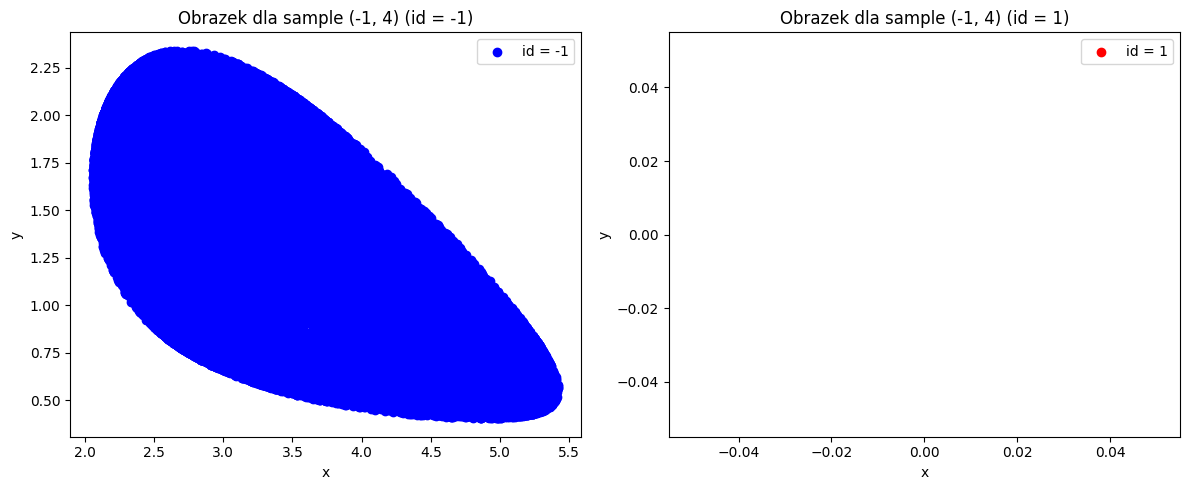

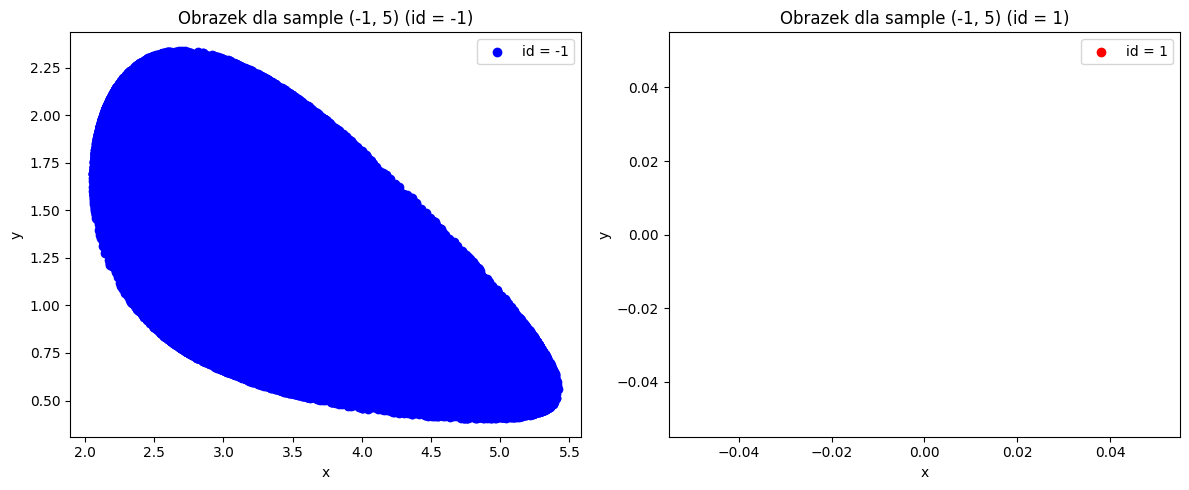

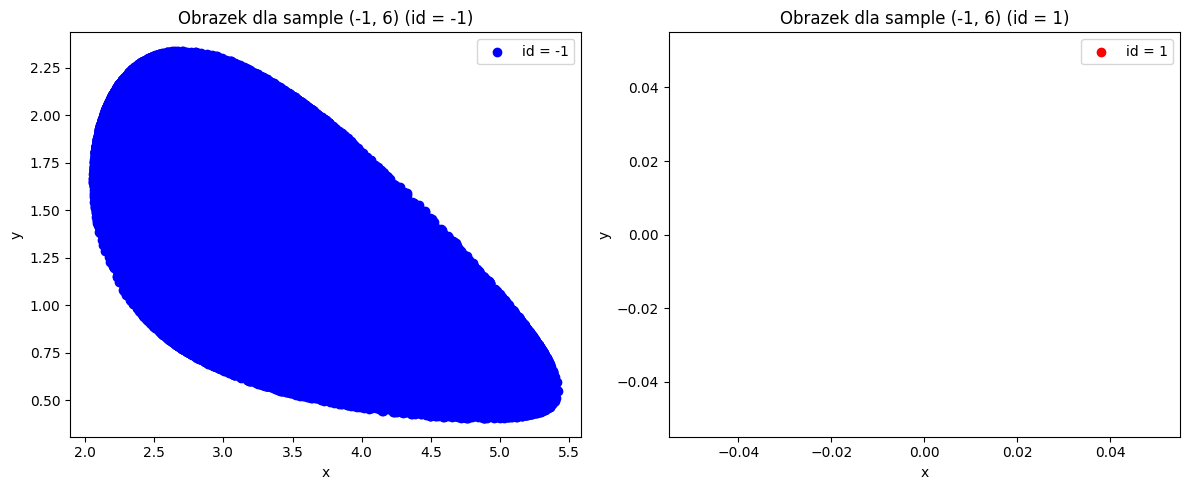

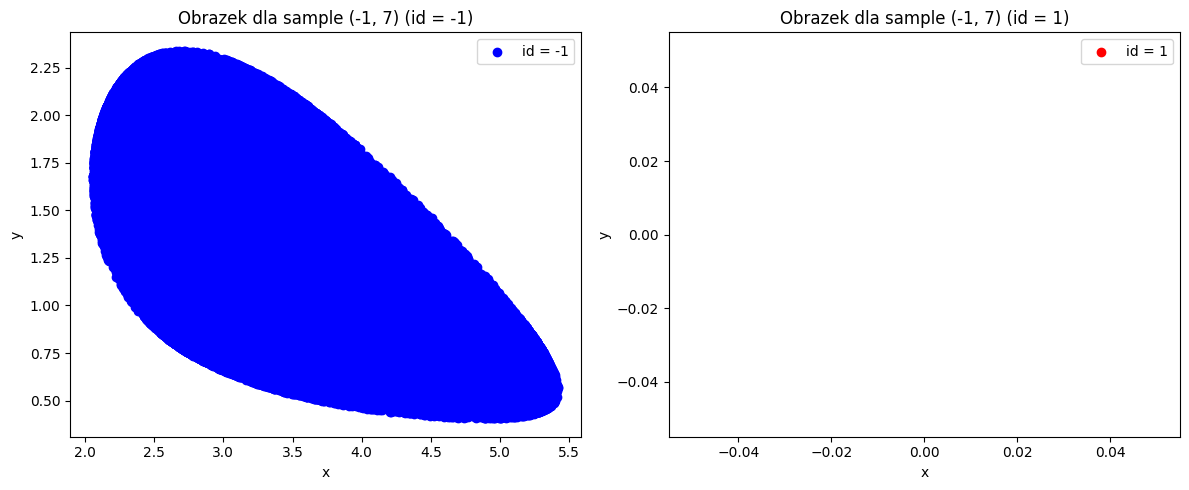

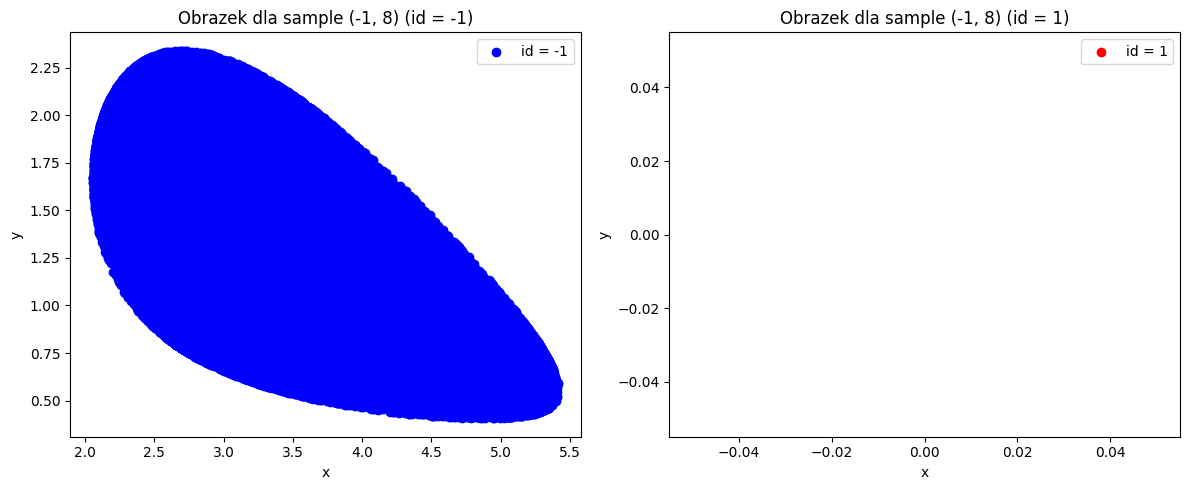

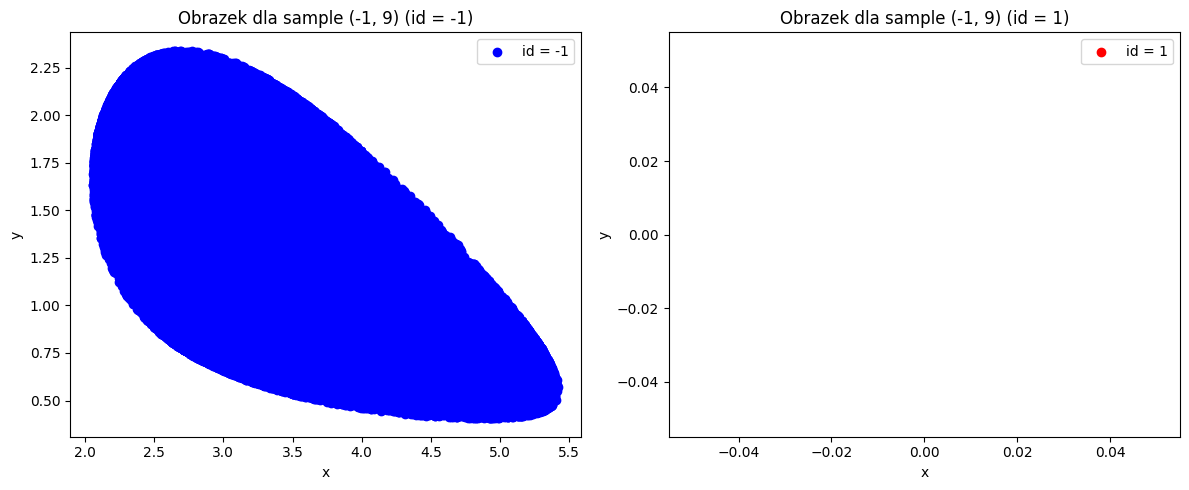

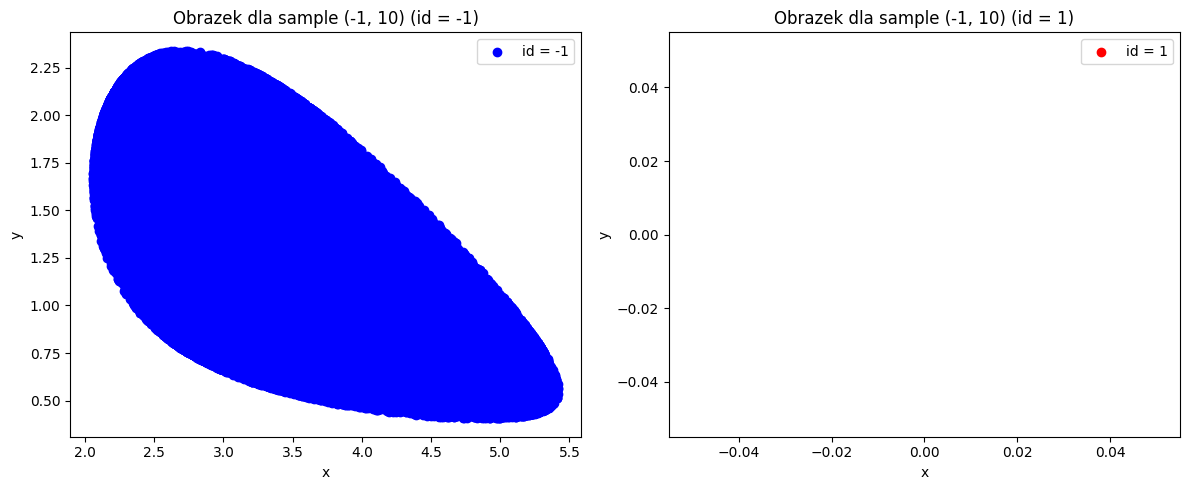

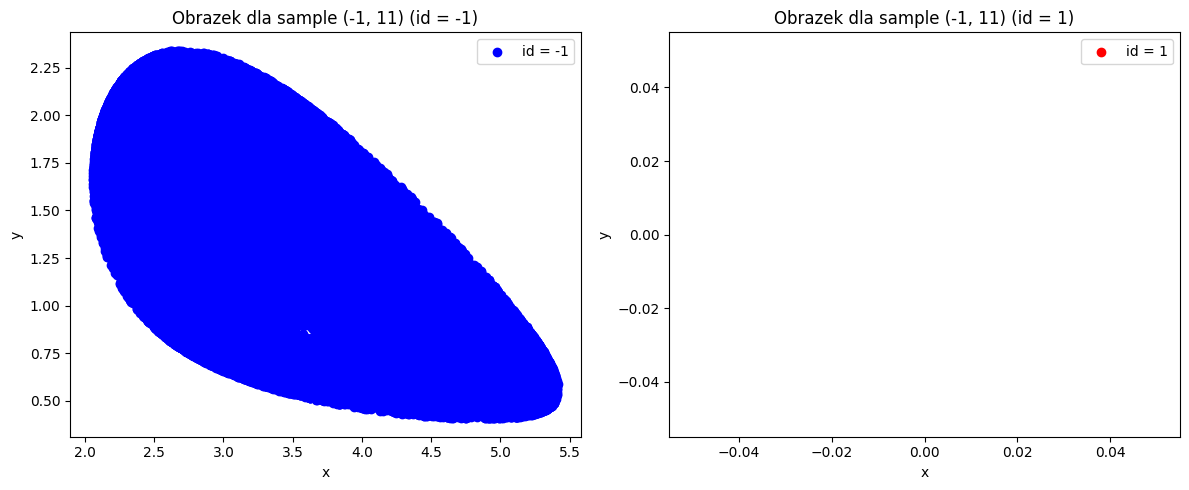

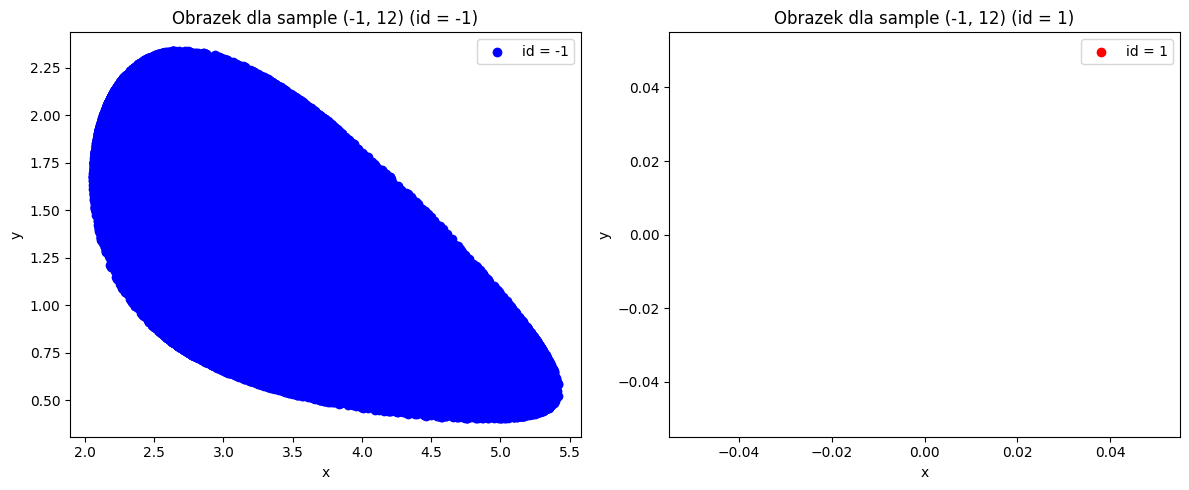

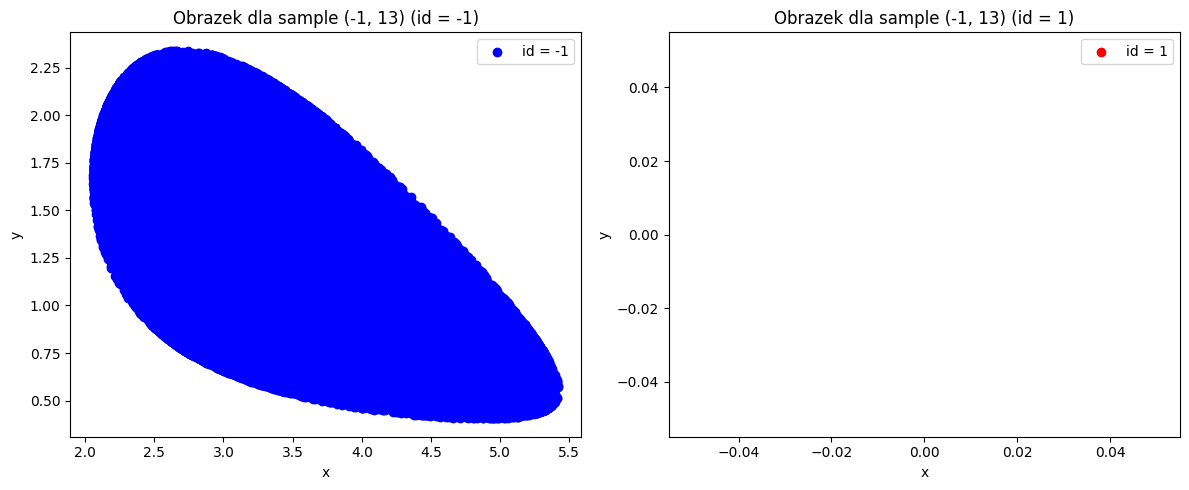

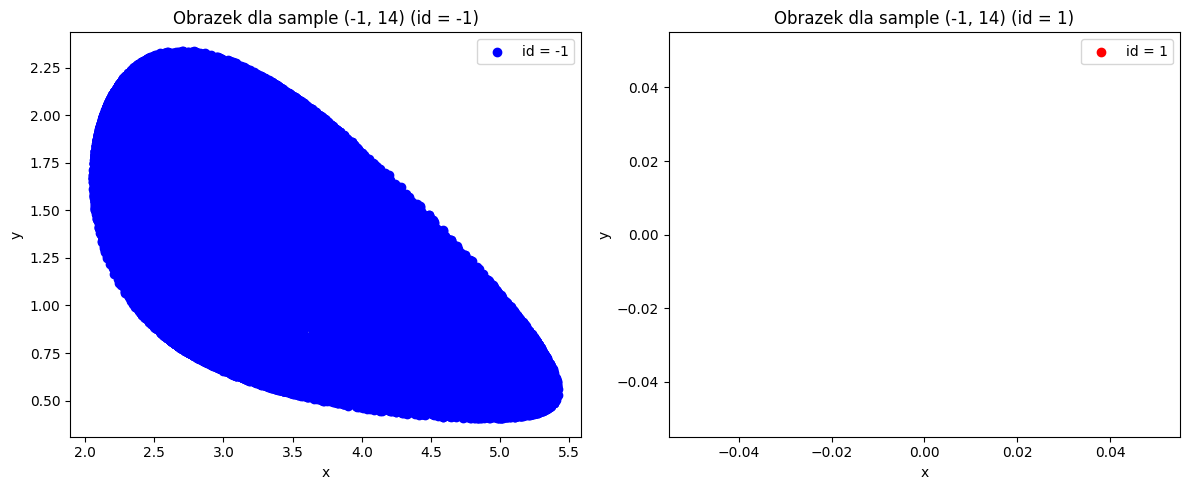

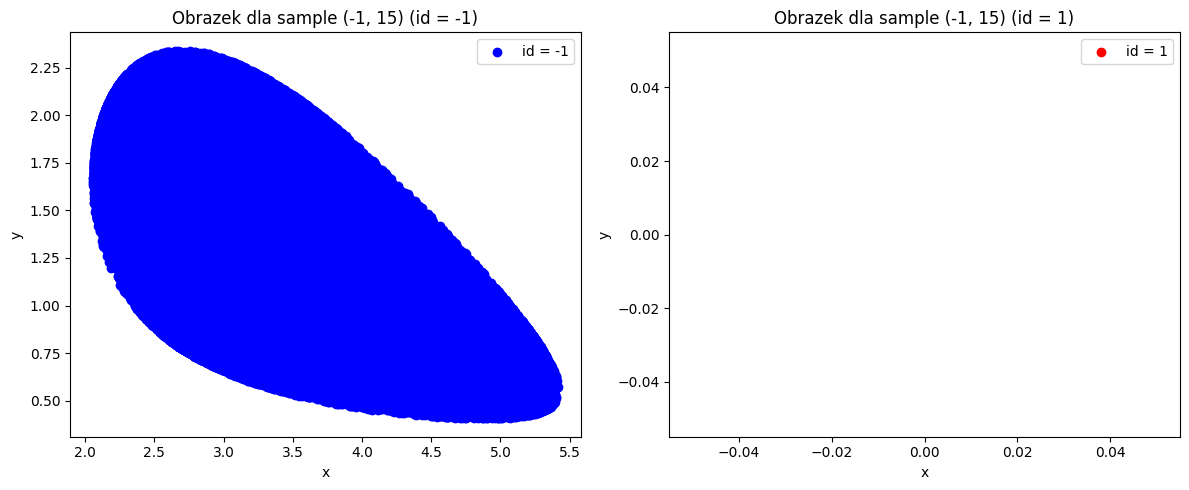

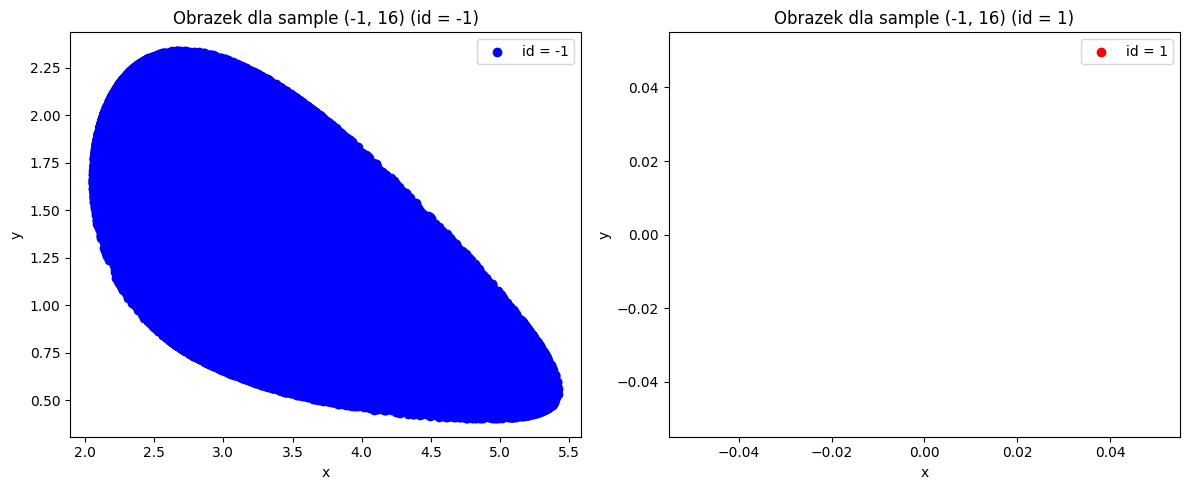

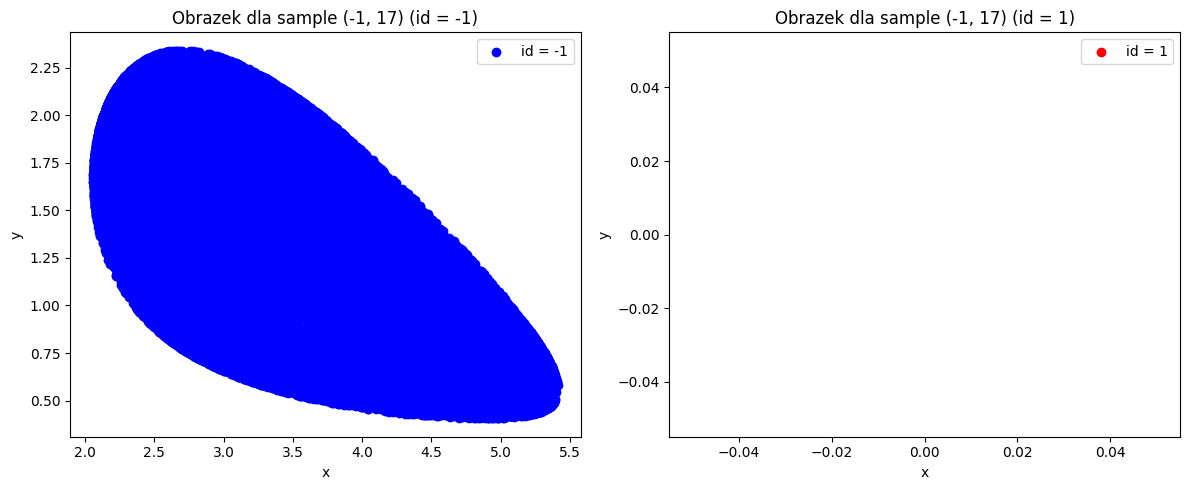

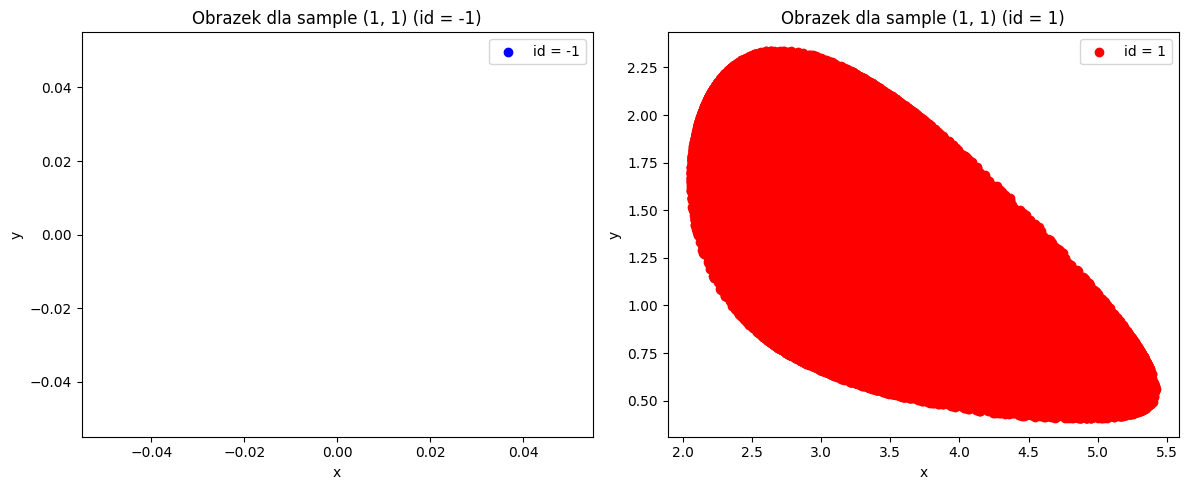

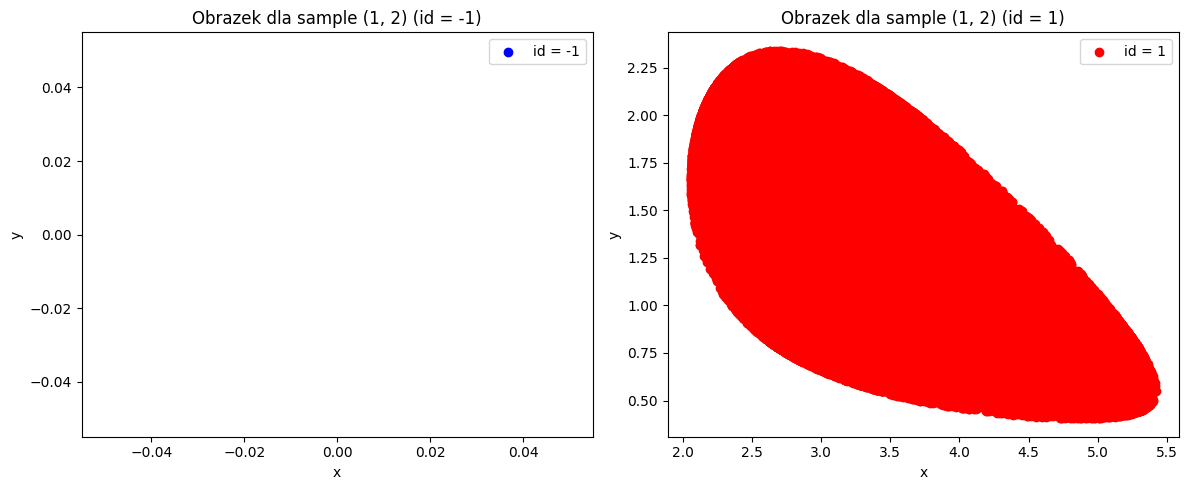

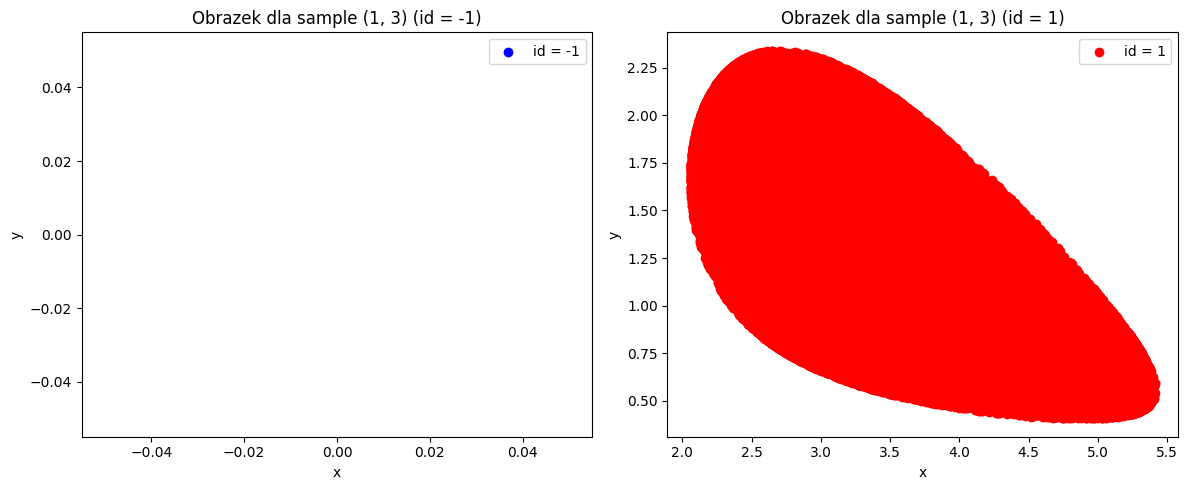

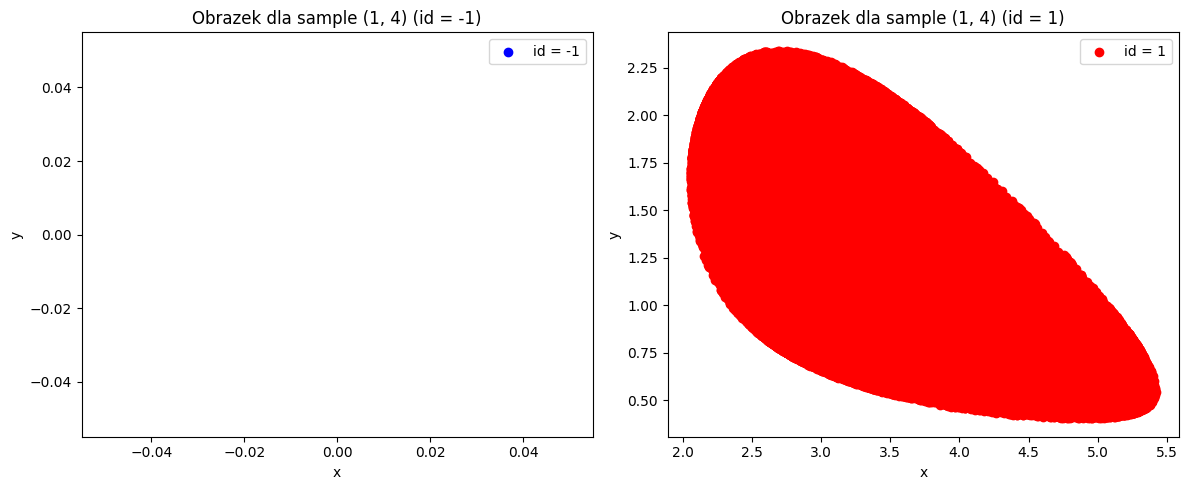

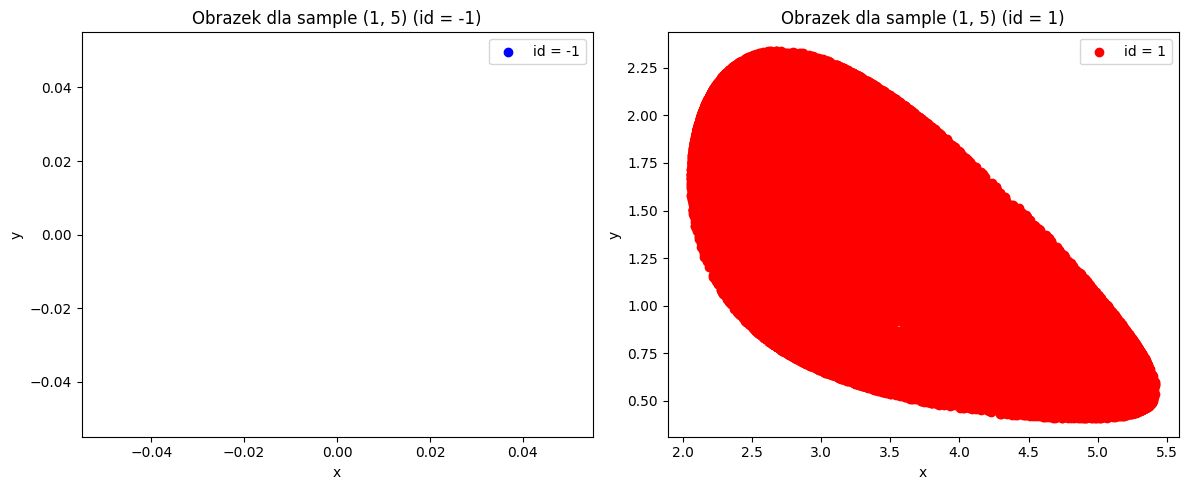

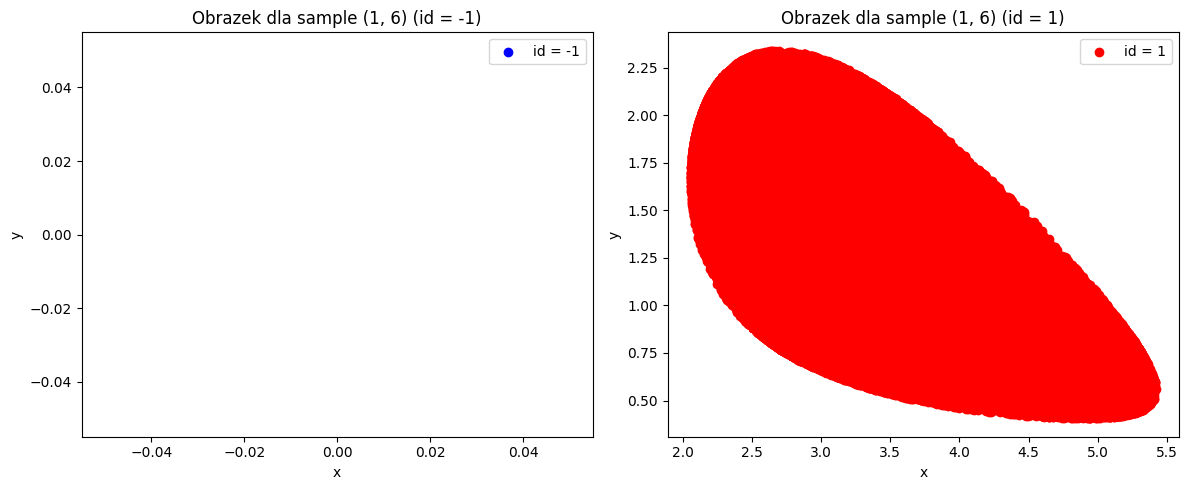

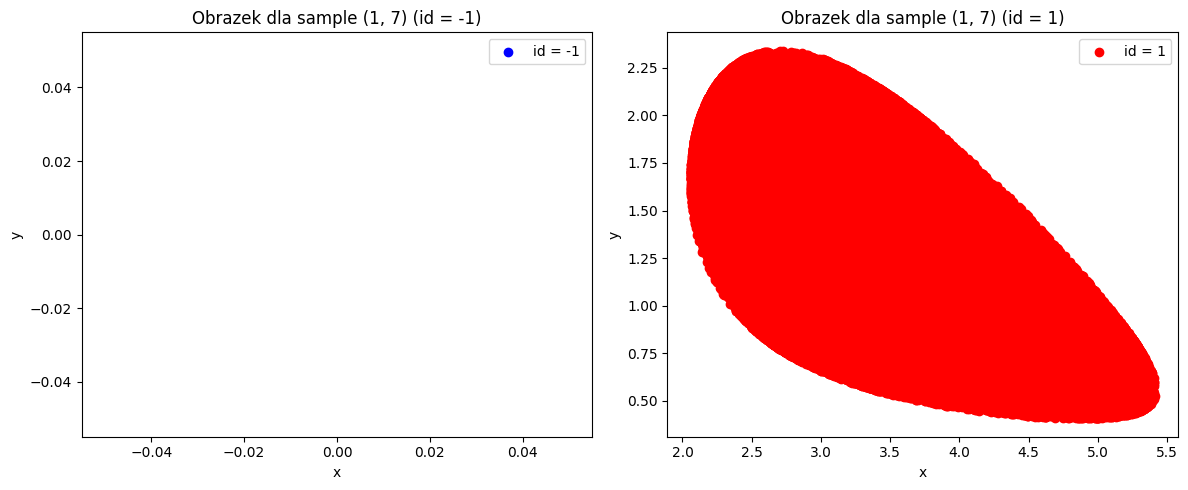

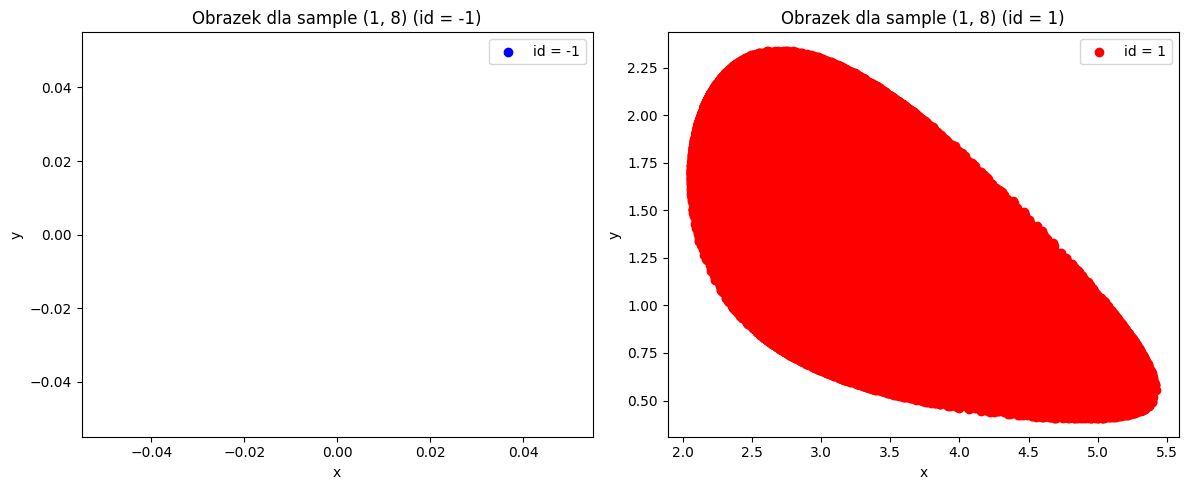

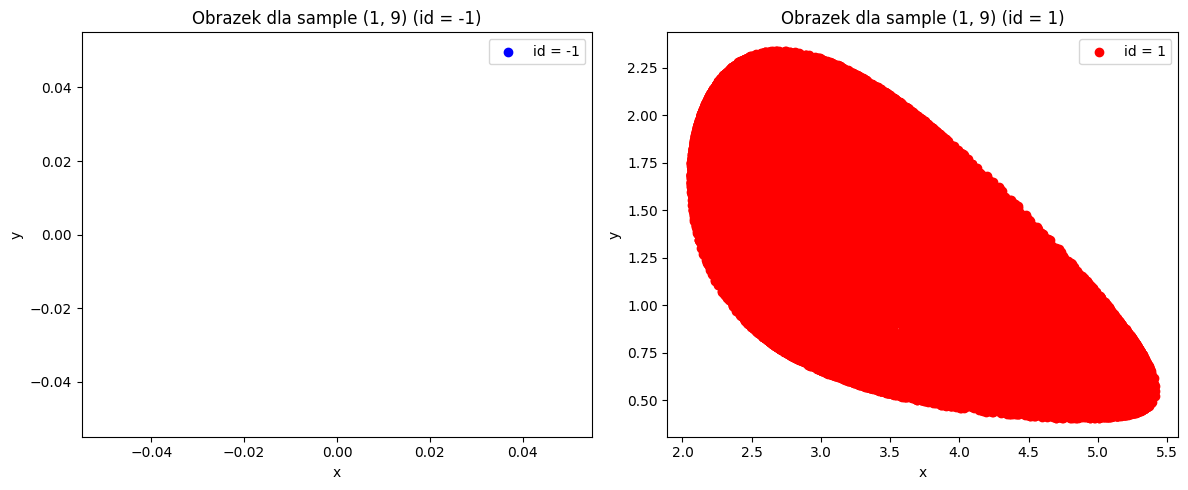

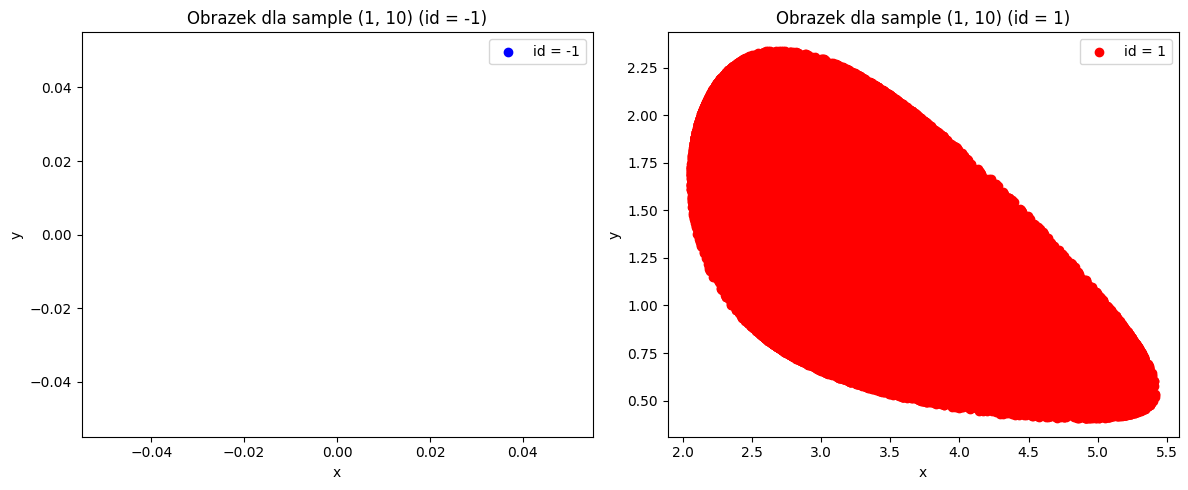

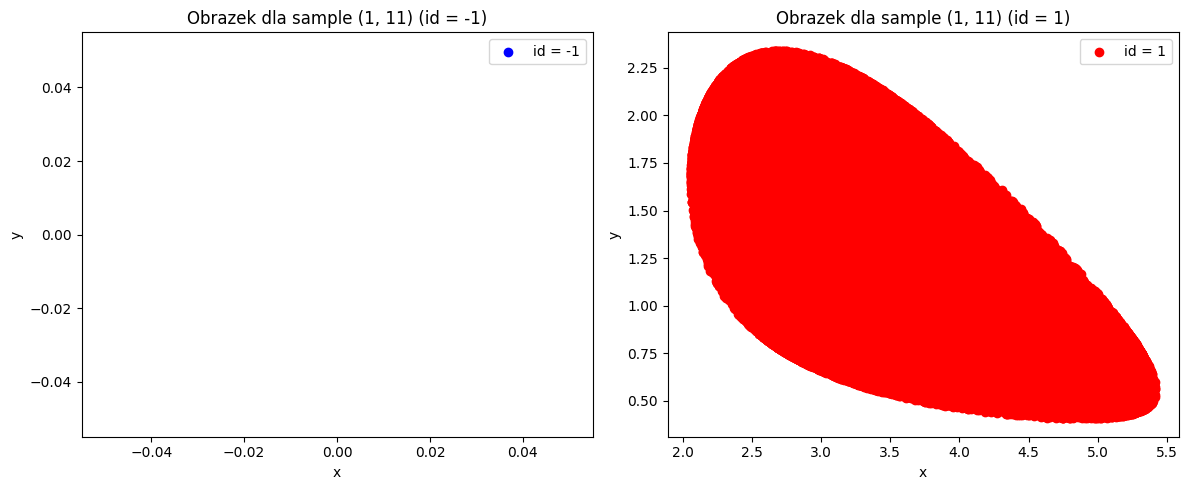

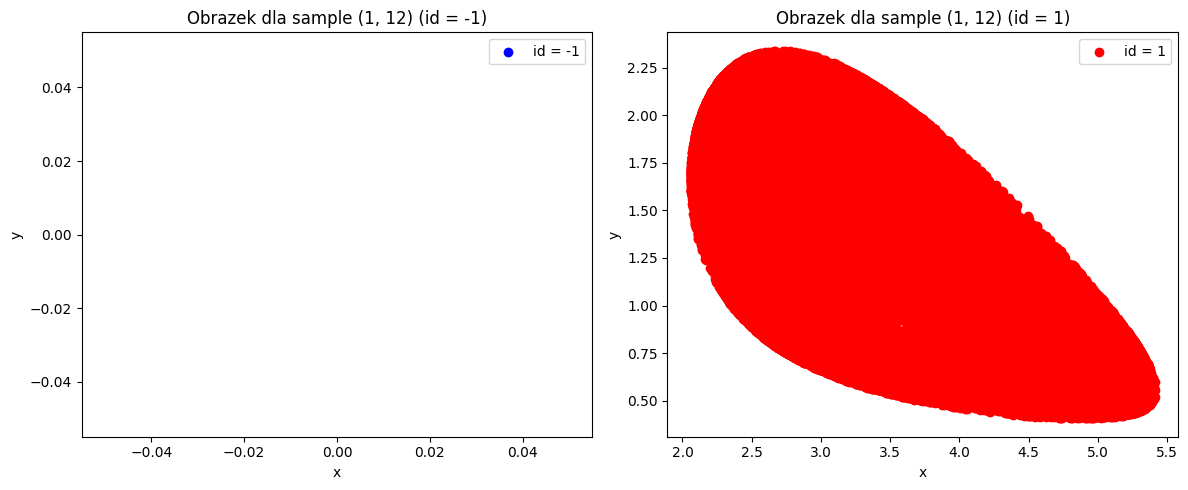

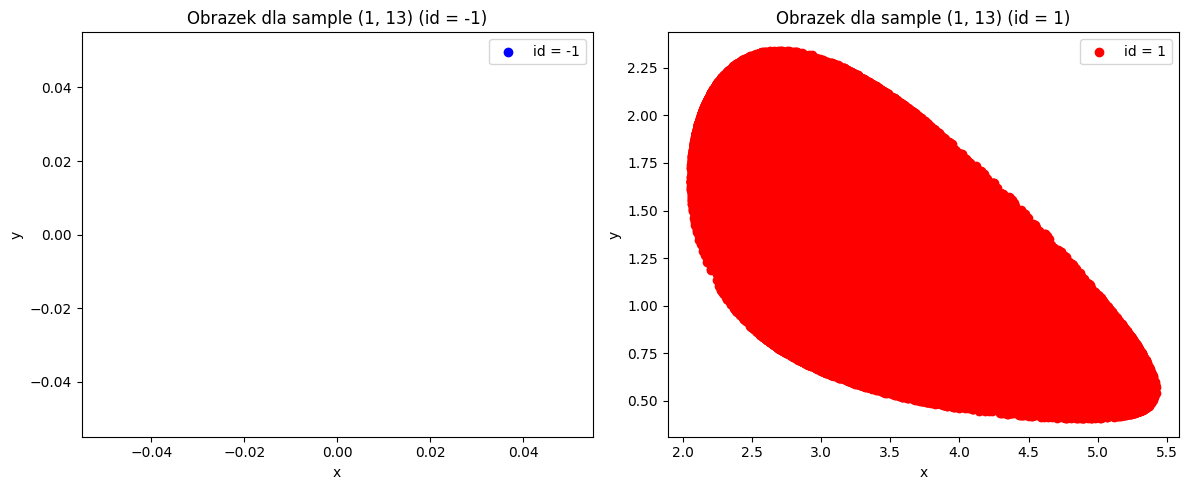

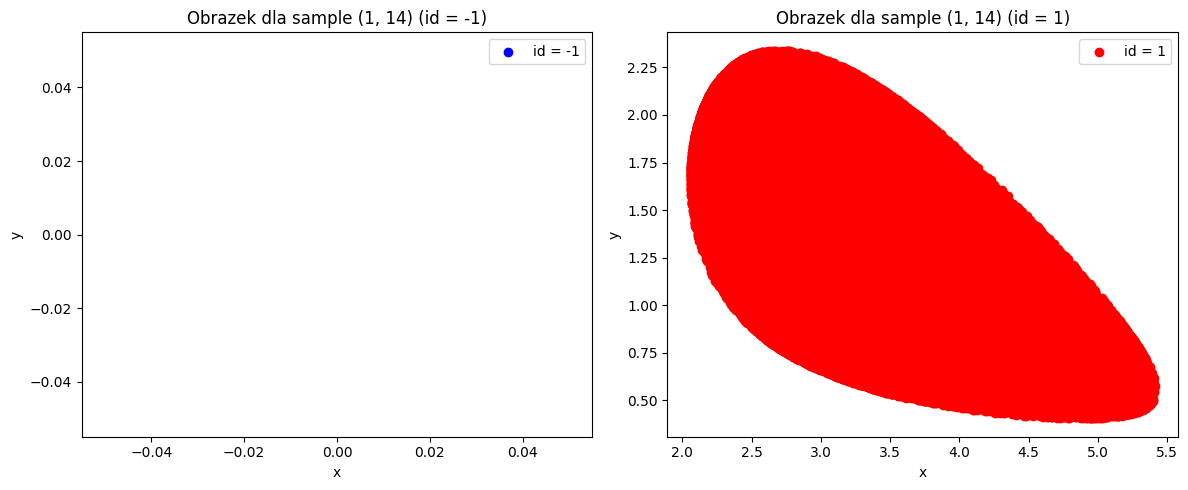

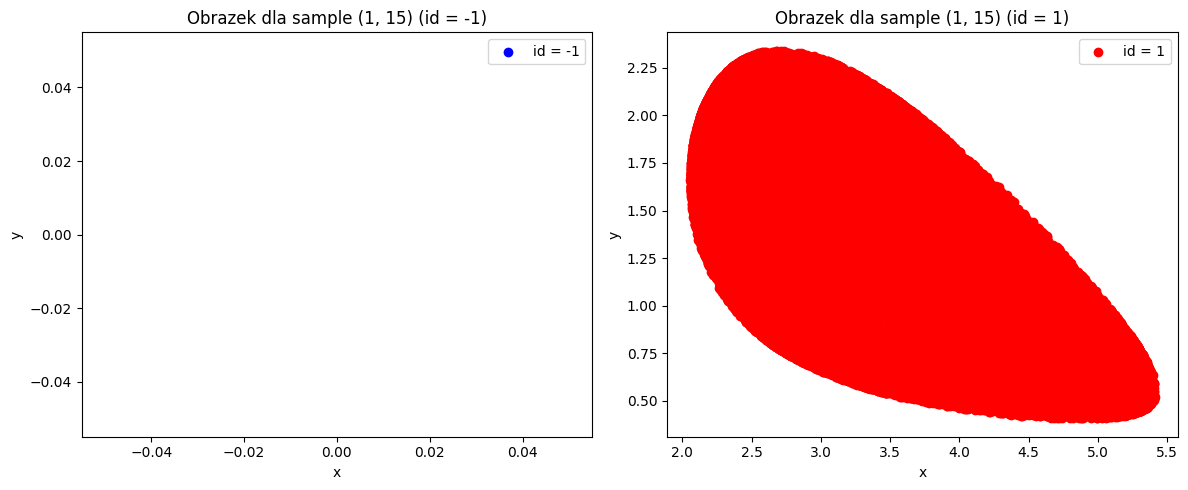

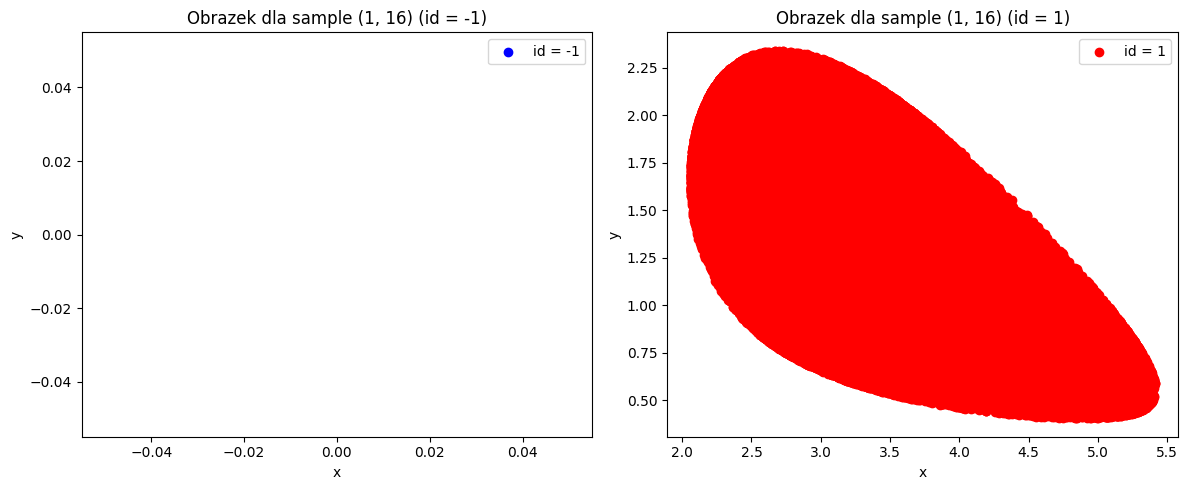

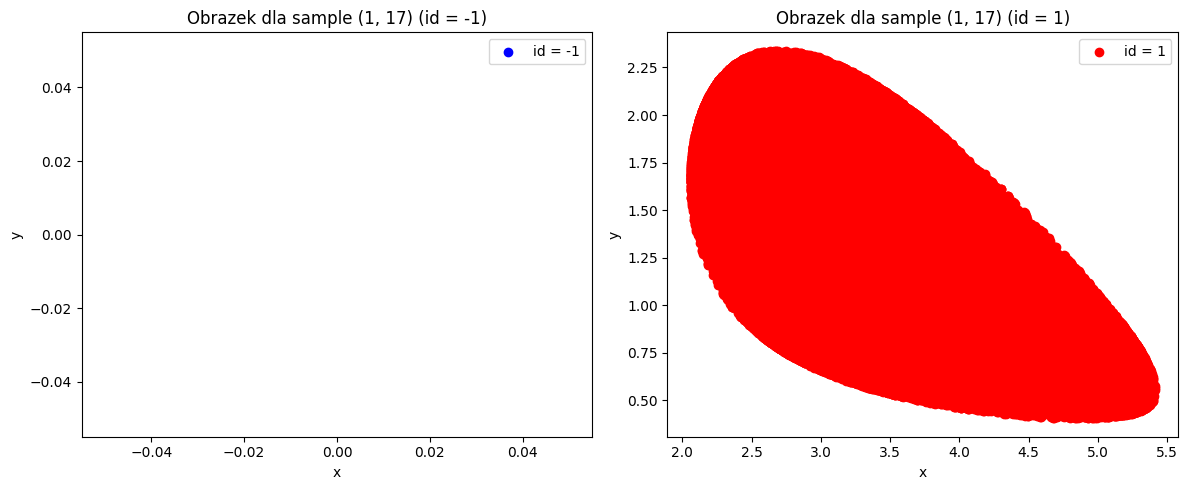

In [25]:
print_images()

In [20]:
diff = ImageChops.difference(img1, img2)
if diff.getbbox():
    diff.show()
else:
    print("No differences")

SyntaxError: incomplete input (651428162.py, line 4)

In [22]:
features = data_df[['x', 'y']]

kmeans = KMeans(n_clusters=2)
kmeans.fit(features)
labels = kmeans.labels_

features['cluster'] = labels

differences = features.groupby('cluster').mean()

print(differences)

                x         y
cluster                    
0        2.846125  1.513839
1        4.558589  0.979796


C:\Users\szymo\AppData\Local\Temp\ipykernel_14876\1519792538.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = labels
